# Chapter 3 Hydraulics: Pipe Hydraulics

1. [Introduction: Weir and Notches](#1.-Introduction)
2. [Simulation](#2.-Simulation)
3. [Self-Assessment](#3.-Self-Assessment)

## 1. Introduction

### 🌊 Head Loss in Pipes: Concepts, Estimation & Applications

![image.png](attachment:71aa6310-9ff0-453b-bbb5-da3d38b87345.png)

### 📘 What Is Head Loss?

Head loss refers to the reduction in total head (hydraulic energy) of a fluid as it flows through a pipe system. It arises from:

- **Frictional losses**: caused by pipe wall resistance (major losses)
- **Local disturbances**: such as bends, valves, fittings (minor losses)

Head loss is expressed in units of length (meters or feet), indicating the height of fluid lost due to resistance.

---

### 📐 Estimating or Measuring Head Loss

### 1. Empirical Formulas

#### 🔸 Darcy–Weisbach Equation (General Use)
$$ h_f = f \cdot \frac{L}{D} \cdot \frac{v^2}{2g} $$

- $( h_f $): head loss
- $( f $): friction factor
- $( L $): pipe length
- $( D $): pipe diameter
- $( v $): flow velocity
- $( g $): gravitational acceleration

#### 🔸 Hazen–Williams Equation (For Water)
$$ h_f = 10.67 \cdot \frac{L}{C^{1.85}} \cdot \left(\frac{Q^{1.85}}{D^{4.87}}\right) $$

- Best suited for turbulent water flow in municipal systems

### 2. Minor Losses
$$ h_m = K \cdot \frac{v^2}{2g} $$

- $( K $): fitting/valve loss coefficient
- Used for elbows, tees, reducers, valves, etc.

### 3. Measurement Methods

- **Pressure gauge readings** across pipe sections
- **Flow meters** with energy grade line tracking
- **Manometers** for lab setups

---

### 🧭 Importance of Head Loss

### 🔹 Design Optimization
- Determines pump power and pipe sizing

### 🔹 Operational Monitoring
- Aids in troubleshooting and system performance tracking

### 🔹 Energy Efficiency
- Lower head loss means reduced operational

## Type 1 Problem

### 🔍 Summary – Head Loss Calculator for Flow Through Piles (Jupyter Interactive)

---

### 💡 What It Is

-A jupyter-basedinterative tool to lot the Moodys chart to estimate the darcy friction factor based on Ryenold number and Rouhness. 


-A Jupyter-based interactive tool that estimates **hydraulic head loss** when fluid flows through a group of piles. It uses sliders to define flow and pile parameters, and applies the **Darcy-Weisbach equation** for pressure drop.

---

### ⚙️ How It Works

- Calculates flow velocity from total cross-sectional area of all piles.
- Applies the Darcy-Weisbach formula:
  \[$$
  h_f = f \cdot \frac{L}{D} \cdot \frac{v^2}{2g}
  $$
- Updates results instantly when you click **“Calculate Head Loss.”**

---

### 🧾 Inputs

| Parameter     | Description                           |
|---------------|---------------------------------------|
| `Flow Q`      | Flow rate (m³/s)                      |
| `Pile Dia`    | Diameter of each pile (m)             |
| `Pile Len`    | Length of each pile (m)               |
| `No. of Piles`| Total piles in the group              |
| `Friction f`  | Friction factor (dimensionless)       |

---

### 📈 Outputs

| Output Item      | Meaning                                            |
|------------------|----------------------------------------------------|
| `Estimated Head Loss (m)` | Total pressure drop across pile group      |
| `Flow Rate`      | Input flow rate used for calculation               |
| `Pile Details`   | Group properties contributing to resistance        |
| `Friction Factor`| Used to model flow resistance                      |

> Use this tool to analyze energy losses through pile-supported structures or porous flow regions, especially useful in foundation hydraulics or marine engineering.

### Friction Factor Estimtion: Moodys Chart

C:\Users\satis\AppData\Local\Temp\ipykernel_27556\1374860575.py:10: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(f) + 2.0*np.log10(eD/3.7 + 2.51/(Re*np.sqrt(f)))
C:\Users\satis\AppData\Local\Temp\ipykernel_27556\1374860575.py:19: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  f[i] = fsolve(colebrook, f_initial_guess, args=(r, eD))[0]


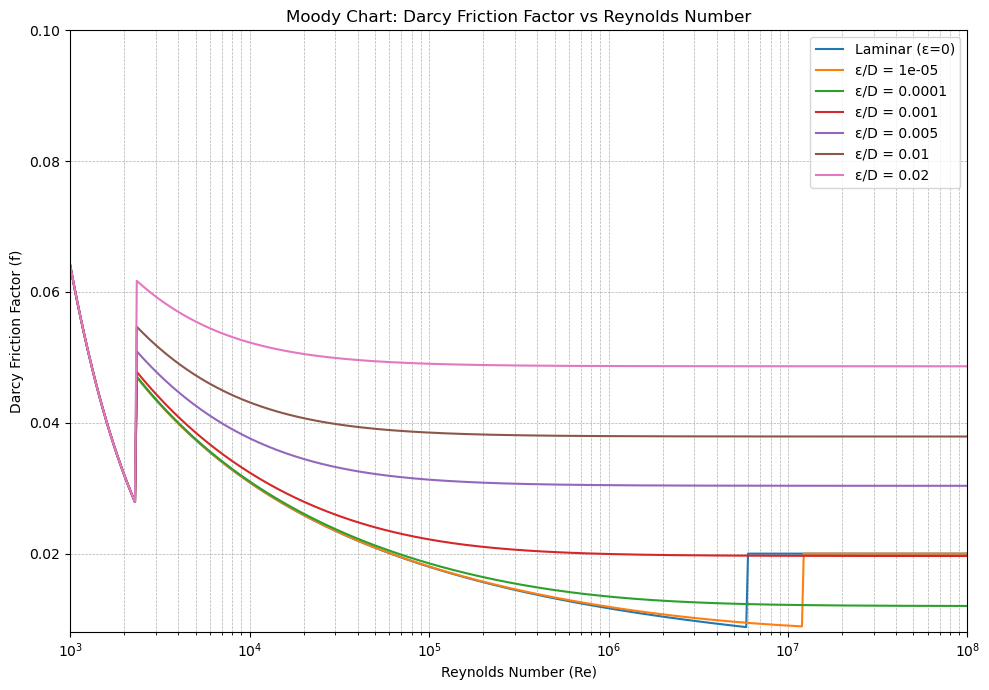

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define Reynolds number range
Re = np.logspace(3, 8, 500)
relative_roughness = [0.0, 0.00001, 0.0001, 0.001, 0.005, 0.01, 0.02]  # Typical values

def colebrook(f, Re, eD):
    return 1/np.sqrt(f) + 2.0*np.log10(eD/3.7 + 2.51/(Re*np.sqrt(f)))

def compute_friction_factor(Re, eD):
    f = np.zeros_like(Re)
    for i, r in enumerate(Re):
        if r < 2300:
            f[i] = 64.0 / r  # Laminar flow
        else:
            f_initial_guess = 0.02
            f[i] = fsolve(colebrook, f_initial_guess, args=(r, eD))[0]
    return f

# Plotting
plt.figure(figsize=(10, 7))
for eD in relative_roughness:
    f = compute_friction_factor(Re, eD)
    label = f"ε/D = {eD}" if eD != 0 else "Laminar (ε=0)"
    plt.semilogx(Re, f, label=label)

plt.xlabel("Reynolds Number (Re)")
plt.ylabel("Darcy Friction Factor (f)")
plt.title("Moody Chart: Darcy Friction Factor vs Reynolds Number")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xlim(1e3, 1e8)
plt.ylim(0.008, 0.1)
plt.tight_layout()
plt.show()

In [5]:
import ipywidgets as widgets
from IPython.display import display, Markdown
import math

# --- Darcy-Weisbach head loss function ---
def head_loss(Q, D, L, n, f, g=9.81):
    # Convert flow rate Q (m³/s) to velocity
    A = (math.pi * D**2 / 4) * n  # total cross-sectional flow area through all piles
    if A == 0:
        return 0.0
    v = Q / A  # flow velocity per pile group
    h_f = f * (L / D) * (v**2 / (2 * g))  # Darcy-Weisbach equation
    return h_f

# --- Interactive widgets ---
Q_slider = widgets.FloatSlider(value=0.1, min=0.001, max=2.0, step=0.01, description='Flow Q (m³/s)')
D_slider = widgets.FloatSlider(value=0.3, min=0.05, max=2.0, step=0.01, description='Pile Dia (m)')
L_slider = widgets.FloatSlider(value=5.0, min=0.5, max=30.0, step=0.5, description='Pile Len (m)')
n_slider = widgets.IntSlider(value=4, min=1, max=100, step=1, description='No. of Piles')
f_slider = widgets.FloatSlider(value=0.02, min=0.005, max=0.1, step=0.001, description='Friction f')

button = widgets.Button(description='Calculate Head Loss')
output = widgets.Output()

def on_click(b):
    with output:
        output.clear_output()
        Q = Q_slider.value
        D = D_slider.value
        L = L_slider.value
        n = n_slider.value
        f = f_slider.value
        h = head_loss(Q, D, L, n, f)
        display(Markdown(
            f"### 🧮 Estimated Head Loss: `{h:.3f} m`\n"
            f"- Flow Rate: `{Q} m³/s`\n"
            f"- Total Piles: `{n}` | Diameter: `{D} m` | Length: `{L} m`\n"
            f"- Friction Factor: `{f}`"
        ))

button.on_click(on_click)

display(widgets.VBox([
    widgets.HTML("<h3>🔧 Head Loss Calculator for Flow Through Piles</h3>"),
    Q_slider, D_slider, L_slider, n_slider, f_slider,
    button, output
]))

## Type 5 Problem: Design

### 🔍 Summary – Pipe Diameter Design Calculator (Jupyter Interactive)

---

### 💡 What It Is
A Jupyter Notebook tool that calculates the required pipe diameter for a given flow rate, pipe material, length, and head loss. It uses interactive widgets to input data and outputs key hydraulic parameters.

---

### ⚙️ How It Works
- Uses the **Darcy-Weisbach equation** and **Swamee-Jain friction factor** to solve for:
  - Pipe diameter needed to match head loss
  - Flow velocity
  - Reynolds number
  - Friction factor

- Iterates via Newton-style update until pressure loss matches input.

---

### 🧾 Inputs
| Parameter     | Description                             |
|---------------|-----------------------------------------|
| `Q (m³/s)`     | Flow rate                               |
| `Length (m)`   | Pipe length                             |
| `Head Loss (m)`| Desired pressure drop                   |
| `Material`     | Pipe material (roughness coefficient)   |

---

### 📈 Output Interpretation
| Output Item         | Meaning                                           |
|---------------------|---------------------------------------------------|
| `Required Diameter` | Minimum pipe size needed to carry the flow        |
| `Velocity (m/s)`    | Speed of flow within the pipe                     |
| `Reynolds Number`   | Flow regime: laminar (<2300) or turbulent         |
| `Friction Factor`   | Coefficient used in head loss calculation         |

> Use this tool to design pipe systems that meet hydraulic constraints based on flow, material, and pressure requirements.

In [6]:
# 📌 Pipe Design Calculator – Jupyter Version

import math
import ipywidgets as widgets
from IPython.display import display, Markdown

# 🔧 Roughness values by material (meters)
roughness = {
    'PVC': 0.0000015,
    'Steel': 0.000045,
    'Cast Iron': 0.00026,
    'Concrete': 0.0003,
    'Copper': 0.0000015
}

# 🧮 Friction factor estimation (Swamee-Jain)
def friction_factor(e, D, Re):
    if Re < 2300:  # Laminar flow
        return 64 / Re
    return 0.25 / (math.log10(e/(3.7*D) + 5.74/Re**0.9))**2

# 🔁 Solver for pipe diameter
def solve_diameter(Q, L, material, head_loss, nu=1e-6, g=9.81):
    e = roughness.get(material, 0.000045)
    D = 0.05  # Initial guess
    for _ in range(100):
        A = math.pi * D**2 / 4
        v = Q / A
        Re = v * D / nu
        f = friction_factor(e, D, Re)
        hf_calc = f * (L / D) * (v**2 / (2 * g))
        D += 0.001 * (head_loss - hf_calc)
        D = max(D, 0.01)
    return D, v, f, Re

# 📊 Interactive widgets
Q_slider = widgets.FloatSlider(value=0.05, min=0.001, max=2.0, step=0.001, description='Q (m³/s)')
L_slider = widgets.FloatSlider(value=30, min=1, max=200, step=1, description='Length (m)')
hf_slider = widgets.FloatSlider(value=5.0, min=0.1, max=30.0, step=0.1, description='Head Loss (m)')
material_dd = widgets.Dropdown(options=list(roughness.keys()), value='PVC', description='Material')
button = widgets.Button(description='Calculate Diameter')
output = widgets.Output()

# 🧠 Button logic
def on_button_click(b):
    with output:
        output.clear_output()
        Q = Q_slider.value
        L = L_slider.value
        hf = hf_slider.value
        material = material_dd.value
        D, v, f, Re = solve_diameter(Q, L, material, hf)
        display(Markdown(f"""
        ### ✅ Pipe Design Result
        - **Material**: `{material}`
        - **Flow Rate**: `{Q:.3f} m³/s` | **Length**: `{L} m` | **Head Loss**: `{hf} m`
        - **Required Diameter**: `{D:.3f} m`
        - **Velocity**: `{v:.2f} m/s` | **Reynolds Number**: `{Re:.0f}`
        - **Friction Factor**: `{f:.3f}`
        """))

button.on_click(on_button_click)

# 🖥️ Display layout
display(widgets.VBox([
    widgets.HTML("<h3>🚰 Pipe Diameter Design Calculator</h3>"),
    Q_slider, L_slider, hf_slider, material_dd, button, output
]))

## Simulation

### 🔍 Summary – Compound Pipe Head Loss Calculator (Jupyter Interactive)

---

### 💡 What It Is
An interactive **Jupyter Notebook tool** that calculates the total head loss across a series of connected pipe segments. Each segment can have its own length, diameter, flow rate, and roughness coefficient.

---

### ⚙️ How It Works
- Uses the **Darcy-Weisbach equation** and **Swamee-Jain formula** to compute:
  - Flow velocity
  - Reynolds number
  - Friction factor
  - Head loss per segment

- Dynamically adjusts the number of pipe segments (1–6) using a slider
- Inputs are entered via text boxes for each segment:
  - `L`: Length in meters  
  - `D`: Diameter in meters  
  - `Q`: Flow rate in m³/s  
  - `e`: Roughness in meters

- On clicking **“Calculate Total Head Loss”**, it:
  - Computes individual losses for each segment
  - Displays velocity, flow regime, and friction factor
  - Sums the losses and outputs **total system head loss**

---

### 📈 How to Interpret Results

| Output Element        | Meaning                                           |
|------------------------|---------------------------------------------------|
| Velocity (m/s)         | Speed of flow through each segment                |
| Reynolds Number        | Flow regime: laminar (<2300) or turbulent         |
| Friction Factor        | Based on pipe roughness and turbulence            |
| Segment Head Loss (m)  | Pressure drop per pipe segment                    |
| Total Head Loss (m)    | Overall system loss due to friction               |

> Use it to evaluate multi-pipe systems in civil, environmental, or mechanical applications.

In [7]:
# 📘 Interactive Compound Pipe Head Loss Calculator – Jupyter Notebook

import math
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

# --- Pipe segment template ---
segment_widgets = []
num_segments = widgets.IntSlider(value=3, min=1, max=6, step=1, description="Pipe Segments")

# --- Constants ---
g = 9.81      # Gravity acceleration (m/s²)
nu = 1e-6     # Kinematic viscosity (m²/s)

# --- Swamee-Jain equation ---
def friction_factor(e, D, Re):
    if Re < 2300:
        return 64 / Re
    return 0.25 / (math.log10(e / (3.7 * D) + 5.74 / Re**0.9))**2

# --- Head loss for one segment ---
def darcy_weisbach(L, D, Q, e):
    A = math.pi * D**2 / 4
    v = Q / A
    Re = v * D / nu
    f = friction_factor(e, D, Re)
    hf = f * (L / D) * (v**2 / (2 * g))
    return hf, f, v, Re

# --- UI generators per segment ---
def make_segment_widgets():
    widgets_list = []
    for i in range(num_segments.value):
        L = widgets.FloatText(value=50, description=f'L{i+1} (m)', step=1)
        D = widgets.FloatText(value=0.1, description=f'D{i+1} (m)', step=0.01)
        Q = widgets.FloatText(value=0.01, description=f'Q{i+1} (m³/s)', step=0.001)
        e = widgets.FloatText(value=0.000045, description=f'e{i+1} (m)', step=0.00001)
        widgets_list.append((L, D, Q, e))
    return widgets_list

# --- Update segment widgets dynamically ---
def update_segments(change=None):
    global segment_widgets
    segment_widgets = make_segment_widgets()
    pipe_inputs.children = [widgets.HBox(w) for w in segment_widgets]

# --- Output logic ---
def calculate_head_loss(b):
    with output:
        clear_output()
        total_loss = 0
        for i, (L, D, Q, e) in enumerate(segment_widgets):
            hf, f, v, Re = darcy_weisbach(L.value, D.value, Q.value, e.value)
            total_loss += hf
            display(Markdown(f"""
            ### 🔧 Segment {i+1}
            - Length: `{L.value} m` | Diameter: `{D.value} m` | Flow: `{Q.value:.3f} m³/s` | Roughness: `{e.value:.5f} m`
            - Velocity: `{v:.2f} m/s` | Reynolds: `{Re:.0f}` | Friction Factor: `{f:.3f}`
            - Head Loss: `{hf:.3f} m`
            """))
        display(Markdown(f"## 💡 Total Head Loss Across System: `{total_loss:.3f} m`"))

# --- Interface layout ---
pipe_inputs = widgets.VBox()
output = widgets.Output()
run_button = widgets.Button(description="Calculate Total Head Loss")
run_button.on_click(calculate_head_loss)
num_segments.observe(update_segments, names="value")

# --- Initial render ---
update_segments()

display(widgets.VBox([
    widgets.HTML("<h3>🌊 Compound Pipe Head Loss – Interactive Calculator</h3>"),
    num_segments,
    pipe_inputs,
    run_button,
    output
]))

## 5. Simulation

## 🔍 Hardy Cross Interactive Flow Balancer – Summary

---

### 💡 What It Is

This Jupyter-based tool uses the **Hardy Cross method** to balance pipe flows in a closed loop with up to six pipes. It's an interactive module where users specify initial flow estimates, pipe resistance coefficients, and flow directions — then iteratively adjusts flows until energy balance is achieved.

---

### ⚙️ How It Works

- **Input Parameters per Pipe**:
  - `Q (m³/s)`: Initial guessed flow
  - `K`: Resistance coefficient (e.g. from Darcy-Weisbach)
  - `Dir`: Direction sign relative to loop ("+" = clockwise, "–" = counterclockwise)

- **Method**:
  - Calculates total loop imbalance from head losses:  
    \( h_f = K Q |Q| \)
  - Computes adjustment \( \Delta Q = -\frac{\sum K Q |Q|}{\sum 2K |Q|} \)
  - Updates each pipe’s flow using directionality
  - Repeats until \( |\Delta Q| < 0.0001 \) (convergence)

---

### 🧾 Inputs

- Number of pipes (2–6)
- For each pipe:
  - Estimated flow `Q`
  - Resistance coefficient `K`
  - Flow direction sign `+` or `–`

---

### 📈 Output Interpretation

| Element            | Meaning                                               |
|--------------------|--------------------------------------------------------|
| `Step n: ΔQ = ...` | Flow correction at each iteration (should approach 0) |
| `Flow = ...`       | Updated balanced flow in each pipe                    |
| `✅ Converged`      | System is hydraulically balanced                     |

---

> Use this to teach loop flow correction, test hydraulic assumptions, or verify pipe designs in looped networks.

In [8]:
# 📘 Hardy Cross Method – Interactive Pipe Network Flow Balancing (Jupyter Version)

import math
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

# --- Assumed friction coefficient per pipe (user-defined) ---
def friction_loss(Q, K):
    return K * Q * abs(Q)  # head loss ∝ Q^2

# --- One loop adjustment step ---
def hardy_cross_adjust(loop, K_values):
    Σ_KQabsQ = 0
    Σ_KabsQ = 0
    for pipe in loop:
        Q = pipe["flow"]
        K = K_values[pipe["name"]]
        Σ_KQabsQ += friction_loss(Q, K)
        Σ_KabsQ += 2 * K * abs(Q)
    ΔQ = -Σ_KQabsQ / Σ_KabsQ
    for pipe in loop:
        pipe["flow"] += ΔQ * (1 if pipe["direction"] == "+" else -1)
    return ΔQ

# --- Interactive pipe loop definition (up to 6 pipes) ---
num_pipes = widgets.IntSlider(value=4, min=2, max=6, step=1, description="Loop Pipes")
pipe_widgets = []
K_inputs = {}
direction_inputs = {}
flow_inputs = {}

def update_loop_inputs(change=None):
    pipe_widgets.clear()
    K_inputs.clear()
    direction_inputs.clear()
    flow_inputs.clear()
    for i in range(num_pipes.value):
        name = f"P{i+1}"
        flow_inputs[name] = widgets.FloatText(value=10.0, step=0.1, description=f"{name} Q (m³/s)")
        K_inputs[name] = widgets.FloatText(value=1.0, step=0.1, description=f"{name} K")
        direction_inputs[name] = widgets.Dropdown(options=["+", "-"], value="+", description=f"{name} Dir")
        pipe_widgets.append(widgets.HBox([flow_inputs[name], K_inputs[name], direction_inputs[name]]))
    loop_box.children = pipe_widgets

# --- Compute and display adjustments ---
output = widgets.Output()
def calculate_flow_balance(b):
    with output:
        clear_output()
        # Setup pipe loop
        loop = []
        K_vals = {}
        for name in flow_inputs:
            Q = flow_inputs[name].value
            K = K_inputs[name].value
            D = direction_inputs[name].value
            loop.append({"name": name, "flow": Q, "direction": D})
            K_vals[name] = K

        # Iterate Hardy Cross
        display(Markdown("### 🔄 Iterative Hardy Cross Adjustments"))
        for step in range(1, 11):
            ΔQ = hardy_cross_adjust(loop, K_vals)
            display(Markdown(f"- Step {step}: ΔQ = `{ΔQ:.4f} m³/s`"))
            for p in loop:
                display(Markdown(f"`{p['name']}` → Flow = `{p['flow']:.4f} m³/s`"))
            if abs(ΔQ) < 0.0001:
                display(Markdown("✅ Converged"))
                break

# --- Layout ---
run_btn = widgets.Button(description="Solve with Hardy Cross")
run_btn.on_click(calculate_flow_balance)
loop_box = widgets.VBox()
num_pipes.observe(update_loop_inputs, names='value')
update_loop_inputs()

display(widgets.VBox([
    widgets.HTML("<h3>🚰 Hardy Cross Loop Flow Balancer – Interactive</h3>"),
    num_pipes,
    loop_box,
    run_btn,
    output
]))

## 7 Simulation

### 🔍 Summary – "Three Reservoir Flow Balancer"

---

### 💡 What It Is
An interactive **Jupyter Notebook tool** that calculates water flow between three connected reservoirs. It uses sliders and input boxes to define reservoir elevations and pipe properties, then balances flow using the **Darcy-Weisbach equation** and **Newton-Raphson iterations**.

---

### ⚙️ How It Works
- **Input**:
  - Elevation of each reservoir (A, B, C)
  - Pipe details for AB, BC, and AC: Length (L), Diameter (D), Friction factor (f)
- **Process**:
  - Calculates head loss in each pipe segment
  - Iteratively solves for flows \( Q_{AB}, Q_{BC}, Q_{AC} \) that satisfy energy balance
- **Output**:
  - Shows the flow rate between each reservoir in m³/s

---

### 🧾 How to Run It
1. Open in **Jupyter Notebook or JupyterLab**
2. Install widgets (if needed):  
   ```bash
   pip install ipywidgets

In [9]:
import math
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

# 🧮 Darcy-Weisbach Head Loss
def head_loss(Q, L, D, f, g=9.81):
    A = math.pi * D**2 / 4
    V = abs(Q) / A
    return f * L / D * V**2 / (2 * g)

# 🔁 Flow Solver Using Newton-Raphson
def solve_flows(H1, H2, H3, pipe_props):
    Q12, Q23, Q13 = 0.5, 0.3, 0.2  # initial guesses
    for _ in range(30):  # iteration limit
        HL12 = head_loss(Q12, *pipe_props["12"])
        HL23 = head_loss(Q23, *pipe_props["23"])
        HL13 = head_loss(Q13, *pipe_props["13"])

        F1 = H1 - H2 - HL12 * math.copysign(1, Q12)
        F2 = H2 - H3 - HL23 * math.copysign(1, Q23)
        F3 = H1 - H3 - HL13 * math.copysign(1, Q13)

        dHL12 = 2 * HL12 / Q12
        dHL23 = 2 * HL23 / Q23
        dHL13 = 2 * HL13 / Q13

        Q12 += F1 / dHL12
        Q23 += F2 / dHL23
        Q13 += F3 / dHL13

    return Q12, Q23, Q13

# 🧾 Input Widgets
elev_A = widgets.FloatSlider(value=120, min=50, max=200, step=1, description="Reservoir A")
elev_B = widgets.FloatSlider(value=90, min=50, max=200, step=1, description="Reservoir B")
elev_C = widgets.FloatSlider(value=60, min=50, max=200, step=1, description="Reservoir C")

L12 = widgets.FloatText(value=500, description="L12 (m)")
D12 = widgets.FloatText(value=0.3, description="D12 (m)")
f12 = widgets.FloatText(value=0.02, description="f12")

L23 = widgets.FloatText(value=400, description="L23 (m)")
D23 = widgets.FloatText(value=0.25, description="D23 (m)")
f23 = widgets.FloatText(value=0.025, description="f23")

L13 = widgets.FloatText(value=600, description="L13 (m)")
D13 = widgets.FloatText(value=0.35, description="D13 (m)")
f13 = widgets.FloatText(value=0.018, description="f13")

# 🧠 Compute Button
button = widgets.Button(description="Calculate Flows")
output = widgets.Output()

def on_click(b):
    with output:
        clear_output()
        H1, H2, H3 = elev_A.value, elev_B.value, elev_C.value
        props = {
            "12": [L12.value, D12.value, f12.value],
            "23": [L23.value, D23.value, f23.value],
            "13": [L13.value, D13.value, f13.value]
        }
        Q12, Q23, Q13 = solve_flows(H1, H2, H3, props)
        display(Markdown(f"""
        ### ✅ Computed Flows Between Reservoirs
        - 💧 Q<sub>A → B</sub>: `{Q12:.3f} m³/s`
        - 💧 Q<sub>B → C</sub>: `{Q23:.3f} m³/s`
        - 💧 Q<sub>A → C</sub>: `{Q13:.3f} m³/s`
        """))

button.on_click(on_click)

# 🖥️ Layout
display(widgets.VBox([
    widgets.HTML("<h3>🌊 Three Reservoir Flow Balancer – Interactive</h3>"),
    widgets.HBox([elev_A, elev_B, elev_C]),
    widgets.HTML("<b>Pipe AB</b>"), widgets.HBox([L12, D12, f12]),
    widgets.HTML("<b>Pipe BC</b>"), widgets.HBox([L23, D23, f23]),
    widgets.HTML("<b>Pipe AC</b>"), widgets.HBox([L13, D13, f13]),
    button, output
]))

## 7. Self-Assessment

### 🔎 Reflective Questions: Pipe Flow Analysis

### 🚰 Head Loss
- How does increasing pipe roughness influence head loss in real-world systems over time?
- In what scenarios might minimizing head loss not be the primary design objective?
- Reflect on your most recent hydraulic model—did your head loss predictions align with observed values? Why or why not?

### 🔄 Compound Pipes
- Why is it important to consider continuity of flow and cumulative head loss in compound pipelines?
- How does the choice between materials or diameters across segments affect total energy loss?

### 🔁 Hardy Cross Method
- How would you explain the benefits and limitations of iterative loop analysis to someone unfamiliar with network modeling?
- When might Hardy Cross be preferred over matrix-based solutions in pipe networks?

### 🏞️ Three-Reservoir Problem
- What assumptions make the three-reservoir problem tractable, and how would you modify the setup for pumping systems?
- How would elevation differences drive flow direction if all reservoirs had identical hydraulic grades?

---

### 🧪 Quiz Questions: Pipe Flow Fundamentals

### 🚰 Head Loss

**Q1. Which parameter does NOT influence head loss in the Darcy–Weisbach equation?**  
- A. Flow velocity  
- B. Pipe diameter  
- C. Pipe material roughness  
- D. Fluid color ✅

**Q2. In turbulent flow, friction factor typically:**  
- A. Decreases with increasing Reynolds number  
- B. Increases with decreasing pipe roughness  
- C. Is constant  
- D. Varies non-linearly ✅

---

### 🔄 Compound Pipes

**Q3. Total head loss in compound pipes is:**  
- A. Average of all losses  
- B. Weighted by pipe lengths  
- C. Sum of individual losses ✅  
- D. Dependent only on the last segment

**Q4. Which property is usually assumed continuous across segments of compound pipes?**  
- A. Velocity head  
- B. Discharge ✅  
- C. Pressure  
- D. Flow area

---

### 🔁 Hardy Cross Method

**Q5. The correction term in Hardy Cross method is derived from:**  
- A. Pipe roughness  
- B. Head imbalance around loop ✅  
- C. Flow velocity difference  
- D. Pump efficiency

---

### 🏞️ Three-Reservoir Problem

**Q6. In solving the three-reservoir problem, which principle is primarily used at the junction?**  
- A. Energy conservation  
- B. Flow continuity ✅  
- C. Momentum balance  
- D. Bernoulli’s Theorem

---